In [1]:
import PAC_experiment_class as pac
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.python.client import timeline
import time

In [2]:
experiment_directory_suffix = "hygiene_detector_for_sensor_72"
experiment_directory_name = None

In [3]:
def initialize_params_for_experiment():
    params_initialization_for_training = {}
    params_initialization_for_training['training_path_zero_labeled'] = "data/0/training_filenames_72.txt"
    params_initialization_for_training['training_path_one_labeled'] = "data/1/training_filenames_72.txt"
    params_initialization_for_training['batch_size'] = 64
    params_initialization_for_training['stage_of_development'] = "training"
    params_initialization_for_training['learning_rate'] = 0.001
    params_initialization_for_training['learning_rate_decay_factor'] = 0.99
    params_initialization_for_training['max_steps'] = None
    params_initialization_for_training['num_epochs'] = 1
    return pac.initialize_params(experiment_directory_name,
                          experiment_directory_suffix,
                          "training",
                          params_initialization_for_training=params_initialization_for_training)

In [4]:
params, filenames_of_training_images, labels_of_training_images = initialize_params_for_experiment()
pac.run_training_with_feed_dictionary(params, "/gpu:0", filenames_of_training_images, labels_of_training_images)

Created model with fresh parameters.
Length of Time (in seconds) for preprocessing 274.36573100090027
Batch Size of List of Filenames 64
Batch Size of List of Label Images 64
global step 1 learning rate 0.0010 step-time 9.83 loss 0.70
Batch Size of List of Filenames 64
Batch Size of List of Label Images 64
global step 2 learning rate 0.0010 step-time 10.36 loss 0.70
Batch Size of List of Filenames 64
Batch Size of List of Label Images 64
global step 3 learning rate 0.0010 step-time 9.02 loss 0.71
Batch Size of List of Filenames 64
Batch Size of List of Label Images 64
global step 4 learning rate 0.0010 step-time 9.12 loss 0.71
Batch Size of List of Filenames 64
Batch Size of List of Label Images 64
global step 5 learning rate 0.0010 step-time 9.69 loss 0.70
Batch Size of List of Filenames 64
Batch Size of List of Label Images 64
global step 6 learning rate 0.0010 step-time 9.40 loss 0.70
Batch Size of List of Filenames 64
Batch Size of List of Label Images 64
global step 7 learning rat

In [ ]:
def initialize_params_for_resuming_training_from_checkpoint():
    params_initialization_for_resume_training = {}
    params_initialization_for_resume_training['resume_training'] = True
    params_initialization_for_resume_training['training_path_zero_labeled'] = "data/0/training_filenames_72.txt"
    params_initialization_for_resume_training['training_path_one_labeled'] = "data/1/training_filenames_72.txt"
    params_initialization_for_resume_training['data_dir'] = 'data'
    params_initialization_for_resume_training['logs_dir'] = 'logs'
    params_initialization_for_resume_training['max_steps'] = 4
    params_initialization_for_resume_training['num_epochs'] = 1
    params_initialization_for_resume_training['batch_size'] = 32
    return pac.initialize_params(experiment_directory_name,
           experiment_directory_suffix,
           "resume_training",
           params_initialization_for_resume_training=params_initialization_for_resume_training)

In [ ]:
params, filenames_of_resume_training_images, labels_of_resume_training_images = initialize_params_for_resuming_training_from_checkpoint()
pac.run_training_with_feed_dictionary(params, "/gpu:0", filenames_of_resume_training_images, labels_of_resume_training_images)

In [4]:
def initialize_params_for_evaluation_from_checkpoint():
    params_initialization_for_evaluation = {}
    params_initialization_for_evaluation['evaluate_model'] = True
    params_initialization_for_evaluation['resume_training'] = False
    params_initialization_for_evaluation['stage_of_development'] = "evaluation"
    params_initialization_for_evaluation['dev_path_zero_labeled'] = "data/0/dev_filenames_72.txt"
    params_initialization_for_evaluation['dev_path_one_labeled'] = "data/1/dev_filenames_72.txt"
    params_initialization_for_evaluation['data_dir'] = 'data'
    params_initialization_for_evaluation['logs_dir'] = 'logs'
    params_initialization_for_evaluation['max_steps'] = None
    params_initialization_for_evaluation['num_epochs'] = 1
    params_initialization_for_evaluation['batch_size'] = 32
    params_initialization_for_evaluation['use_preprocessing'] = True
    return pac.initialize_params(experiment_directory_name,
                                    experiment_directory_suffix,
                                    "evaluation",
                                    params_initialization_for_evaluation=params_initialization_for_evaluation)

In [5]:
params, filenames_of_evaluation_images, labels_of_evaluation_images = initialize_params_for_evaluation_from_checkpoint()
filenames_of_correctly_labeled_images, filenames_of_incorrectly_labeled_images = pac.evaluate_model_with_feed_dictionary(params, "/gpu:0", filenames_of_evaluation_images, labels_of_evaluation_images)

Reading model parameters from logs/0000000017_experiment_2018-01-14_20:10:49_hygiene_detector_for_sensor_72/translate.ckpt-95
Done creating the model.
True
Length of Time (in seconds) for preprocessing 31.207420825958252
Accuracy For Current Batch: 0.6875 
Accuracy For Current Batch: 0.6875 
Accuracy For Current Batch: 0.65625 
Accuracy For Current Batch: 0.65625 
Accuracy For Current Batch: 0.65625 
Accuracy For Current Batch: 0.59375 
Accuracy For Current Batch: 0.78125 
Accuracy For Current Batch: 0.59375 
Accuracy For Current Batch: 0.75 
Accuracy For Current Batch: 0.59375 
Accuracy For Current Batch: 0.59375 
Accuracy For Current Batch: 0.59375 
Accuracy For Current Batch: 0.5625 
Accuracy For Current Batch: 0.71875 
Accuracy For Current Batch: 0.6875 
Accuracy For Current Batch: 0.75 
Accuracy For Current Batch: 0.625 
Accuracy For Current Batch: 0.75 
Accuracy For Current Batch: 0.4375 
Accuracy For Current Batch: 0.6875 
Accuracy For Current Batch: 0.65625 
Accuracy For Curren

In [6]:
print(len(filenames_of_correctly_labeled_images))

1139


In [7]:
print(len(filenames_of_incorrectly_labeled_images))

621


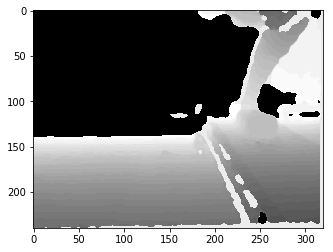

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import re
from os.path import isfile

plt.imshow(filenames_of_incorrectly_labeled_images[0], cmap=plt.cm.gray)

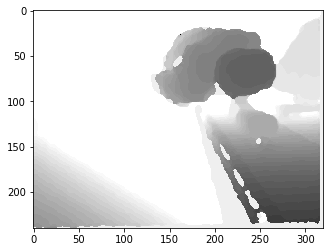

In [21]:
temp0 = np.copy(filenames_of_incorrectly_labeled_images[1])
temp0[filenames_of_incorrectly_labeled_images[1] == 0] = np.amax(filenames_of_incorrectly_labeled_images[1])
plt.imshow(temp0 , cmap=plt.cm.gray)

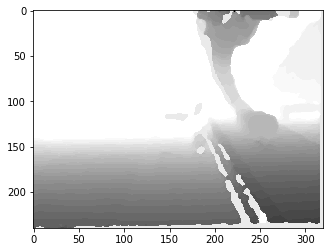

In [20]:
temp1 = np.copy(filenames_of_incorrectly_labeled_images[2])
temp1[filenames_of_incorrectly_labeled_images[2] == 0] = np.amax(filenames_of_incorrectly_labeled_images[2])
plt.imshow(temp1 , cmap=plt.cm.gray)

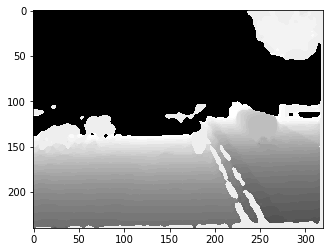

In [12]:
plt.imshow(filenames_of_correctly_labeled_images[0], cmap=plt.cm.gray)

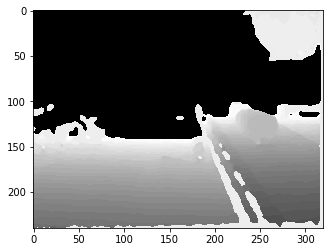

In [13]:
plt.imshow(filenames_of_correctly_labeled_images[1], cmap=plt.cm.gray)

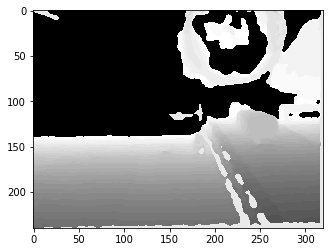

In [14]:
plt.imshow(filenames_of_correctly_labeled_images[2], cmap=plt.cm.gray)

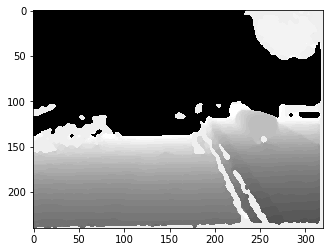

In [15]:
plt.imshow(filenames_of_correctly_labeled_images[3], cmap=plt.cm.gray)

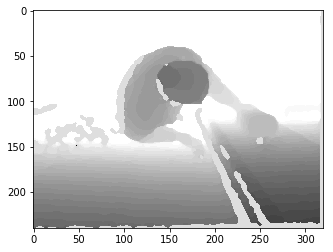

In [22]:
temp4 = np.copy(filenames_of_correctly_labeled_images[4])
temp4[filenames_of_correctly_labeled_images[4] == 0] = np.amax(filenames_of_correctly_labeled_images[4])
plt.imshow(temp4 , cmap=plt.cm.gray)

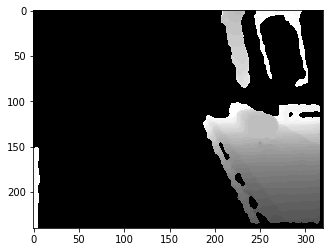

In [17]:
 plt.imshow(filenames_of_correctly_labeled_images[5], cmap=plt.cm.gray)

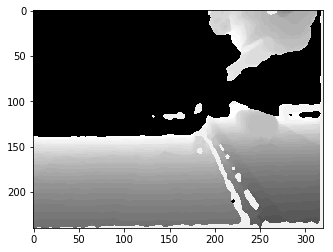

In [18]:
plt.imshow(filenames_of_correctly_labeled_images[6], cmap=plt.cm.gray)

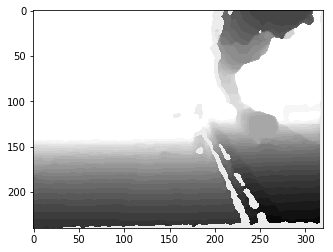

In [23]:
temp7 = np.copy(filenames_of_correctly_labeled_images[7])
temp7[filenames_of_correctly_labeled_images[7] == 0] = np.amax(filenames_of_correctly_labeled_images[7])
plt.imshow(temp7, cmap=plt.cm.gray)